In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import plotly
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from builder import *

import keras
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers.core import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2, l1

from sklearn.model_selection import train_test_split

/Users/bychkov/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:

 This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.


Using Theano backend.


In [3]:
data = np.load('synthetic_imgs/test.npz')

train_x = data['train_x']
train_y = data['train_y']
val_x   = data['valid_x']
val_y   = data['valid_y']
test_x  = data['test_x']
test_y  = data['test_y']

print("Train split: %d; Val split: %d; Test split: %d." % (train_x.shape[0],val_x.shape[0],test_x.shape[0]))

Train split: 3000; Val split: 1000; Test split: 1000.


In [16]:

train_x = np.transpose(train_x, (0,2,3,1))
train_y = train_y
val_x   = np.transpose(val_x, (0,2,3,1))
val_y   = val_y
test_x  = np.transpose(test_x, (0,2,3,1))
test_y  = test_y

In [22]:
import keras.models as models
from keras.layers import InputLayer
from keras.layers.core import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.layers.recurrent import SimpleRNN, LSTM, GRU
from keras.layers.normalization import BatchNormalization


model = models.Sequential()
model.add( InputLayer(input_shape=(111, 111, 3,), name='InputLayer') )

model.add( Conv2D(16, (3, 3), activation='relu') )
model.add( MaxPooling2D(pool_size=(2, 2)) )

model.add( Conv2D(16, (3, 3), activation='relu') )
model.add( MaxPooling2D(pool_size=(2, 2)) )

model.add( Conv2D(32, (3, 3), activation='relu') )
model.add( MaxPooling2D(pool_size=(2, 2)) )

model.add( Conv2D(32, (3, 3), activation='relu') )
model.add( MaxPooling2D(pool_size=(2, 2)) )

model.add( Conv2D(64, (3, 3), activation='relu') )
model.add( MaxPooling2D(pool_size=(2, 2)) )

model.add( Flatten() )
model.add( Dense(128, activation='sigmoid') )
model.add( Dense(1, activation='linear') )


In [12]:
opts                    = dict()
opts['dump_freq']       = 1
opts['plot_freq']       = 1
opts['krs_model']       = model
opts['loss']            = partial_likelihood
opts['metrics_l']       = None
opts['optimizer']       = 'adadelta'
opts['exp_path']        = '/Users/bychkov/GDD/projects/simu/models'
opts['exp_name']        = 'cnn_2'
opts['continue']        = True

In [13]:
network = Builder(  opts = opts,
                    train_data = ( train_x, train_y ),
                    test_data  = ( test_x, test_y ),
                    val_data   = ( val_x, val_y )  ) 

#history = network.train(epoches=15, batch=25, verbose=1)


Restoring the model from: /Users/bychkov/GDD/projects/simu/models/cnn_1
continue from epoch: 50 
Model initialized.


In [ ]:
#history = network.train(epoches=30, batch=train_x.shape[0], shuffle=True, verbose=0)

h 	 t 	 e 	 id
[   0.79733032   82.87000275    1.          780.        ]


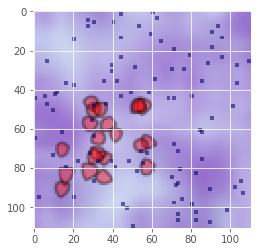

In [23]:
ii = 150
plt.imshow(test_x[ii])
print('h \t t \t e \t id')
print(test_y[ii,...])

In [26]:
test_preds = np.squeeze(network.model.predict(test_x))

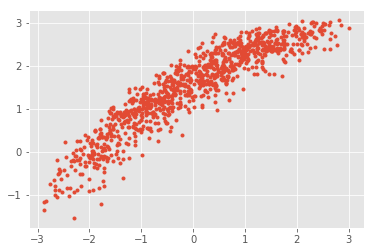

In [42]:
plt.plot(test_y[:,0], test_preds, '.')

In [38]:
sort_idx = np.argsort(test_preds)

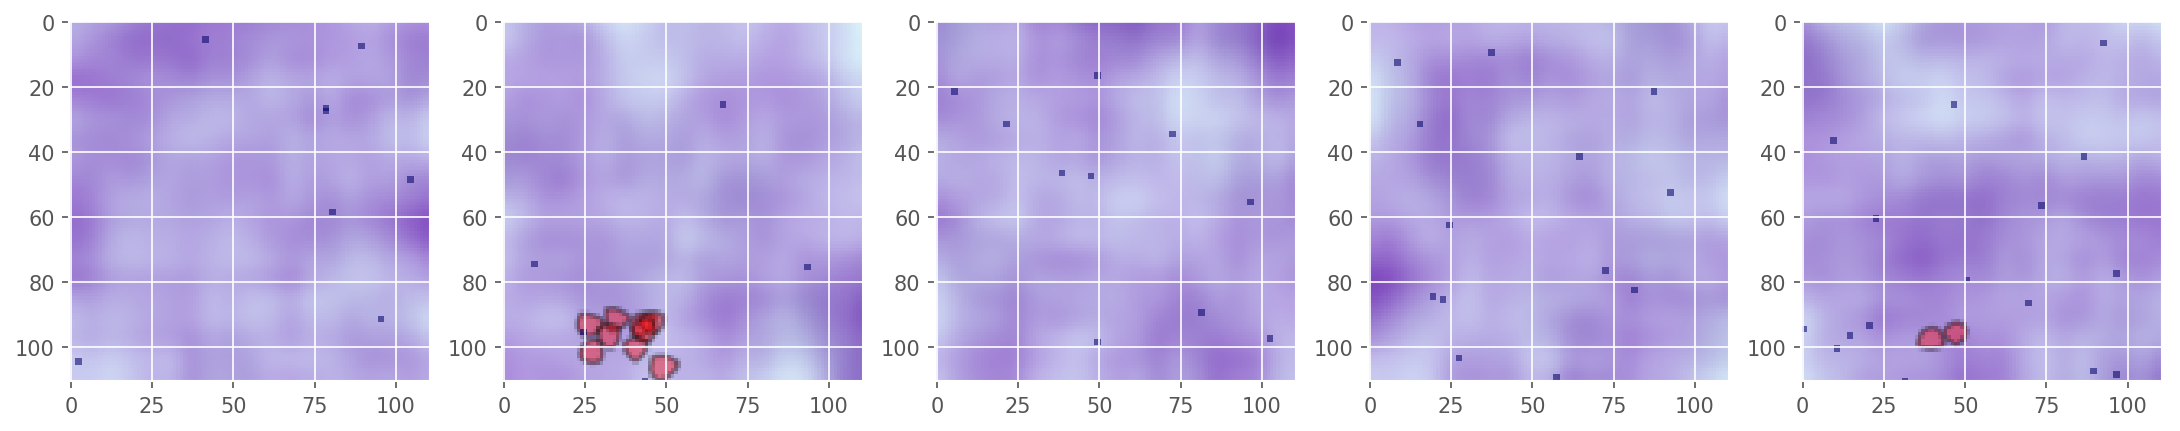

h 		 t 	 e 	 id
[[ -2.87286091e+00   8.01039978e+02   1.00000000e+00   2.19300000e+03]
 [ -1.78099370e+00   1.00000000e+03   0.00000000e+00   5.59000000e+02]
 [ -2.86773348e+00   3.42959991e+02   1.00000000e+00   4.24100000e+03]
 [ -2.83155656e+00   5.86719971e+02   1.00000000e+00   4.39500000e+03]
 [ -2.62597585e+00   1.00000000e+03   0.00000000e+00   4.26900000e+03]]


In [61]:
fig = plt.figure(figsize=(18, 16), dpi=150)
for pp in range(1,6):
    plt.subplot(1,5,pp)
    plt.imshow( test_x[sort_idx[pp]] )
plt.show()
print('h \t\t t \t\t e \t\t id')
print(test_y[sort_idx[1:6],...])

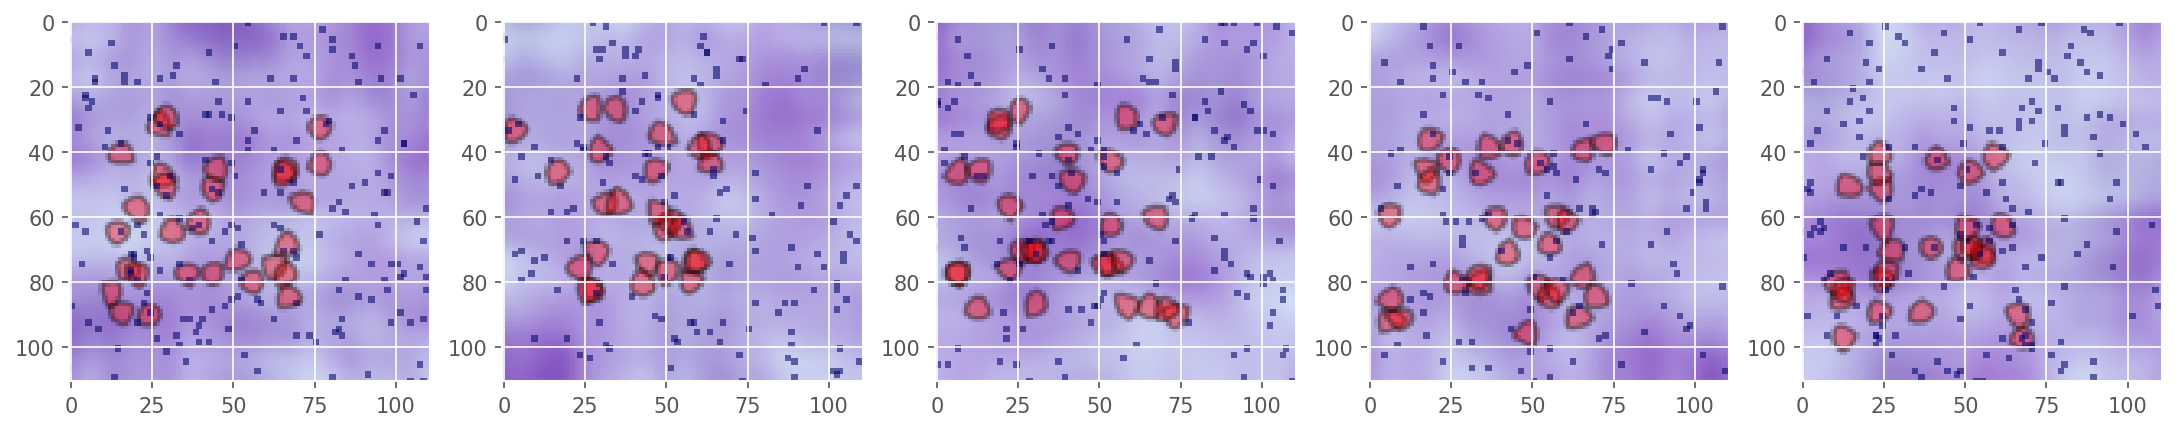

h 		 t 		 e 		 id
[[  2.50242400e+00   5.27500000e+01   1.00000000e+00   4.76300000e+03]
 [  2.30060172e+00   2.81000004e+01   1.00000000e+00   4.30000000e+03]
 [  2.31858516e+00   5.11999989e+00   1.00000000e+00   1.57900000e+03]
 [  2.63397670e+00   2.05999994e+00   1.00000000e+00   1.61000000e+03]
 [  2.10547900e+00   1.64300003e+01   1.00000000e+00   1.43300000e+03]]


In [67]:
fig = plt.figure(figsize=(18, 16), dpi=150)
for pp in range(1,6):
    plt.subplot(1,5,pp)
    plt.imshow( test_x[sort_idx[-pp]] )
plt.show()
print('h \t\t t \t\t e \t\t id')
print(test_y[sort_idx[-6:-1],...])